<a href="https://colab.research.google.com/github/techschneiderrr/.github/blob/main/Datathon_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MM&A's Supermarket Instabasket Aisle Optimization
###Problem Statement
MM&A's Supermarket has partnered with Instabasket for grocery delivery services. The rapid movement of Instabasket personal shoppers within the store has impacted the regular customer shopping experience. MM&A's management wants to optimize their stores for the high demand from Instabasket shoppers by creating a special "Instabasket" aisle. This aisle should contain at most 1000 products and meet refrigeration and freezer constraints, aiming to minimize trips to other aisles and maximize customer satisfaction.

###Code Overview
Our Python script will address this problem by performing the following steps:

####Data Exploration:
>Examining the dataset's structure, statistics, and patterns to gain initial insights into the data's distribution and potential anomalies.
####Data Preparation:
>Load and preprocess the provided data, including product information, order details, and inventory constraints.
####Product Selection:
>Identify the top 1000 products to place in the "Instabasket" aisle based on their potential to fulfill Instabasket orders efficiently.
####Substitute Product Identification:
>Identify potential substitute products for items not available in the "Instabasket" aisle.
####Order Optimization:
>Optimize the number of orders that utilize in-aisle items and the average percentage of items in each order that utilize in-aisle items, considering the identified substitutes.
####Recommendations:
>Provide a list of the top 1000 products for the "Instabasket" aisle and a strategy for encouraging customers to accept substitutes.
####Visualization (Optional):
>Visualize the results and insights to support decision-making.


##Data Exploration
>Load and preprocess the provided data, including product information, order details, and inventory constraints.

###Load Data from External Source
>We will load the provided dataset to analyze and optimize the "Instabasket" aisle.

In [ ]:
pip install gdown

In [2]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Replace 'your_file_id' with the actual file ID from the Google Drive sharing link
file_id = '1Hu8yk9ljfoUY7dVzhvvzOwUh44S_dmdn'
file_id_minified = '16F4gp7h3KSSTClAmPfyI8OfCynYm8U5o'

# Define the Google Drive file URL
url = f'https://drive.google.com/uc?id={file_id}'
url_minified = f'https://drive.google.com/uc?id={file_id_minified}'

# Specify the local file path where you want to save the downloaded file
output_path = 'your_data.csv'
output_path_minified = 'output_path_minified.csv'

# Download the file from Google Drive
gdown.download(url, output_path, quiet=False)
gdown.download(url_minified, output_path_minified, quiet=False)

# Read the downloaded CSV file into a Pandas DataFrame
minified_data = pd.read_csv(output_path_minified)
data = pd.read_csv(output_path)
df = pd.read_csv(output_path)
df1 = pd.read_csv(output_path)

styled_df = data.style.set_table_styles([{'selector': '','props': [('border', '2px solid black')]}])

Downloading...
From: https://drive.google.com/uc?id=1Hu8yk9ljfoUY7dVzhvvzOwUh44S_dmdn
To: /content/your_data.csv
100%|██████████| 67.1M/67.1M [00:01<00:00, 37.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=16F4gp7h3KSSTClAmPfyI8OfCynYm8U5o
To: /content/output_path_minified.csv
100%|██████████| 671k/671k [00:00<00:00, 105MB/s]


###Analysing basic statistics of the data provided
>Here we have obtained the values of all the statisticals constants for describng the data provided.

In [ ]:
summary_stats = data.describe(include='all')
summary_stats = summary_stats.style.set_table_styles([{'selector': '','props': [('border', '2px solid black')]}])
summary_stats

###Department wise product list
>Looking at the top 10 products of each departmen for exploring the most common items in the orders from each department.


In [ ]:
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming you already have 'data' defined
grouped = data.groupby('department')

# Define a list to store styled DataFrames
styled_dfs = []

# Define the maximum number of rows to display per DataFrame
max_rows = 10

# Iterate through groups and format each group's data
for department, group_data in grouped:
    # print(f"Department: {department}")
    # print()
    group_df = group_data[['product_name', 'department', 'aisle']].head(max_rows)

    # Check if there are more rows to display
    if len(group_data) > max_rows:
        group_df = group_df.append(pd.Series(['...', '...', '...'], index=['product_name', 'department', 'aisle']), ignore_index=True)

    styled_group_df = group_df.style.set_table_styles([{'selector': '', 'props': [('border', '2px solid black')]}])
    styled_dfs.append((department, styled_group_df))

# Display each styled DataFrame
for department, styled_df in styled_dfs:
    print(f"Department: {department}")
    display(styled_df)
    print()

Department: alcohol



Department: babies



Department: bakery



Department: beverages



Department: breakfast



Department: bulk



Department: canned goods



Department: dairy eggs



Department: deli



Department: dry goods pasta



Department: frozen



Department: household



Department: international



Department: meat seafood



Department: missing



Department: other



Department: pantry



Department: personal care



Department: pets



Department: produce



Department: snacks


###List of Departments
>Analysing the department wise distribution of orders and identifying highest and lowest ordered selling department.

In [ ]:
# Assuming you already have 'data' defined
department_order_counts = data.groupby('department')['order_id'].nunique()

# Find the department with the maximum order counts
max_order_department = department_order_counts.idxmax()
max_order_count = department_order_counts[max_order_department]

# Find the department with the minimum order counts
min_order_department = department_order_counts.idxmin()
min_order_count = department_order_counts[min_order_department]

# Create a DataFrame to display the department order counts
order_counts_df = pd.DataFrame({'Department': department_order_counts.index, 'Order Count': department_order_counts.values})

# Define a function to highlight the maximum and minimum order departments
def highlight_max_min(s):
    is_max = s == max_order_count
    is_min = s == min_order_count
    styles = ['background-color: yellow' if v else '' for v in is_max]
    styles = ['background-color: lightblue' if v else s for v, s in zip(is_min, styles)]
    return styles

# Apply styling to the DataFrame and set table styles
styled_order_counts_df = order_counts_df.style.apply(highlight_max_min, subset=['Order Count']).\
    set_table_styles([{'selector': '', 'props': [('border', '2px solid black')]}])

# Display the styled DataFrame
styled_order_counts_df

###Plot of the department wise order distribution
>Analysing the department wise distribution of orders and identifying highest and lowest ordered selling department through a bar graphical.

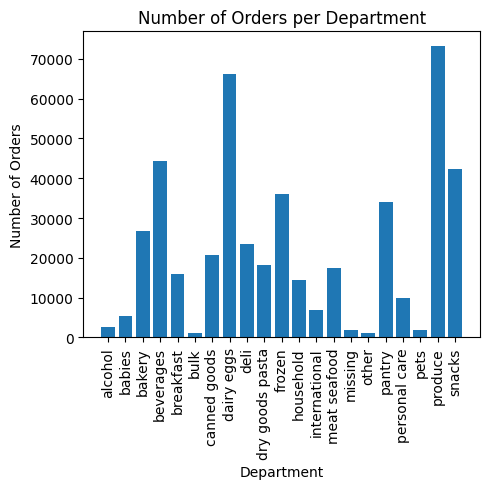

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(5,5))  # Set the figure size

# Plot the department names on the x-axis and the number of orders on the y-axis
plt.bar(department_order_counts.index, department_order_counts.values)

# Customize the plot
plt.title('Number of Orders per Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

###Map of departments to aisles
>Here we have segregated the aisles based on their departments and grouped them together to form a map with department name as the key and an array aisle names as the value.

In [ ]:
# Group the data by department and collect unique aisles within each department
department_aisles = df.groupby('department')['aisle'].unique().reset_index()

# Display department-wise aisles
for index, row in department_aisles.iterrows():
    department = row['department']
    aisles = row['aisle']
    print(f"Department: {department}")
    print("Aisles:", ', '.join(map(str, aisles)))
    print()

Department: alcohol
Aisles: beers coolers, spirits, red wines, white wines, specialty wines champagnes

Department: babies
Aisles: baby food formula, baby bath body care, baby accessories, diapers wipes

Department: bakery
Aisles: bread, breakfast bakery, buns rolls, bakery desserts, tortillas flat bread

Department: beverages
Aisles: refrigerated, energy sports drinks, water seltzer sparkling water, juice nectars, soft drinks, coffee, tea, cocoa drink mixes

Department: breakfast
Aisles: breakfast bars pastries, granola, cereal, hot cereal pancake mixes

Department: bulk
Aisles: bulk dried fruits vegetables, bulk grains rice dried goods

Department: canned goods
Aisles: canned meat seafood, canned fruit applesauce, canned meals beans, soup broth bouillon, canned jarred vegetables

Department: dairy eggs
Aisles: yogurt, other creams cheeses, packaged cheese, eggs, soy lactosefree, milk, cream, butter, refrigerated pudding desserts, specialty cheeses

Department: deli
Aisles: prepared s

###Visualisation of department Contribution to the top 1000 products
>Here we have identified the top 1000 products based on how many times the particular product has been ordered.

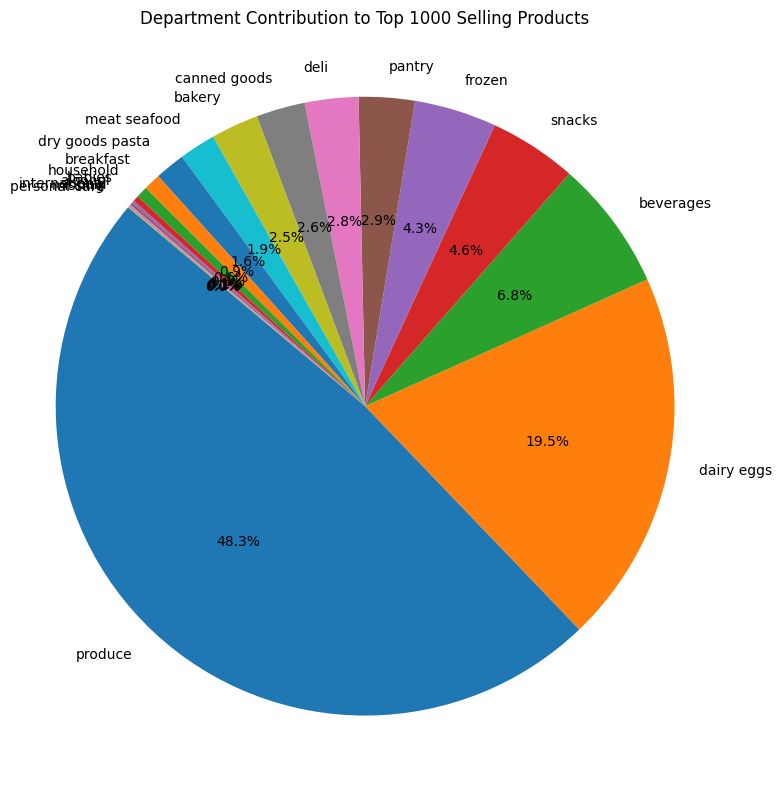

In [ ]:
# Calculate the total number of sales for each product
product_sales = data['product_name'].value_counts()

# Get the top 1000 selling products, including the top 100 frozen and refrigerated items
top_products = product_sales.nlargest(1000).index

# Filter the DataFrame to include only the top 1000 selling products
filtered_df = data[data['product_name'].isin(top_products)]

# Calculate the percentage contribution of each department towards these products
department_contribution = filtered_df['department'].value_counts() / len(filtered_df) * 100

# Create a pie chart to visualize department contributions
plt.figure(figsize=(8, 8))
plt.pie(department_contribution, labels=department_contribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Department Contribution to Top 1000 Selling Products')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.tight_layout()
plt.show()

###Visualisation of the top 100 products in each department
>Here we have identified the top 100 products in each department based on how many times the particular product has been ordered.

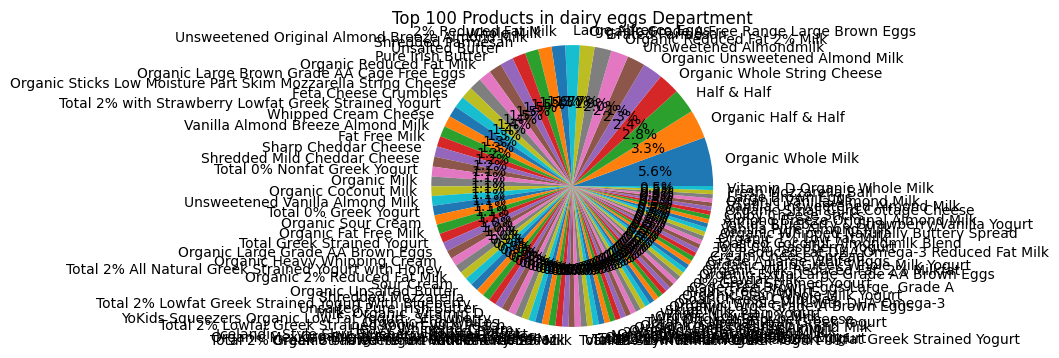

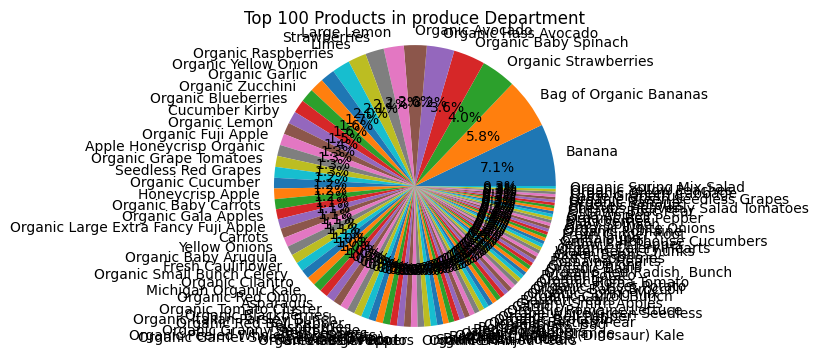

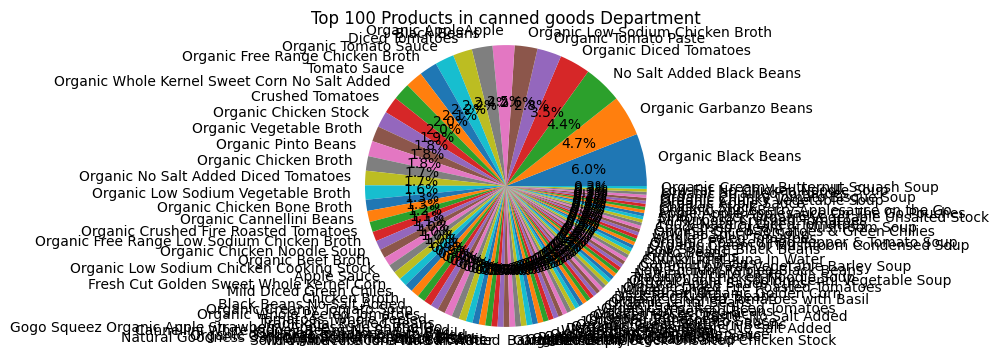

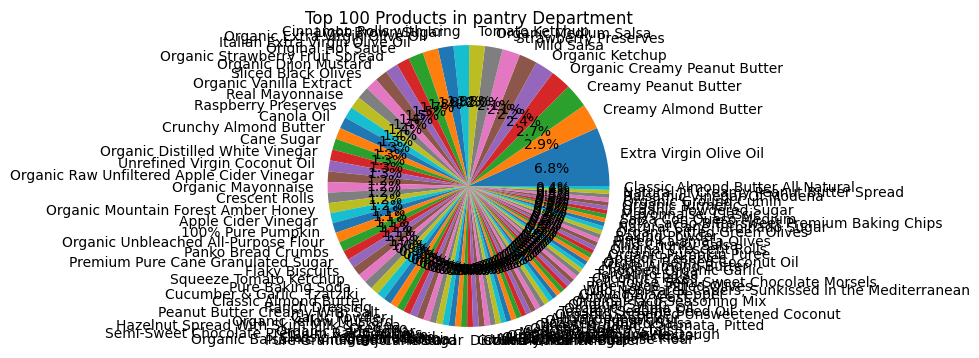

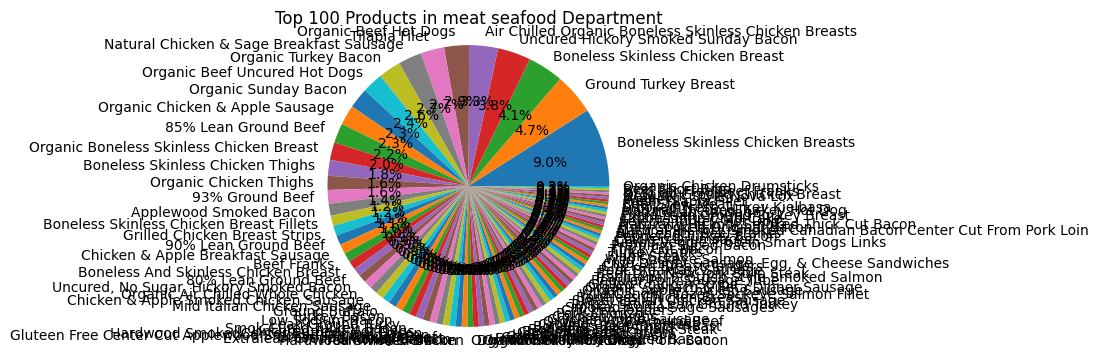

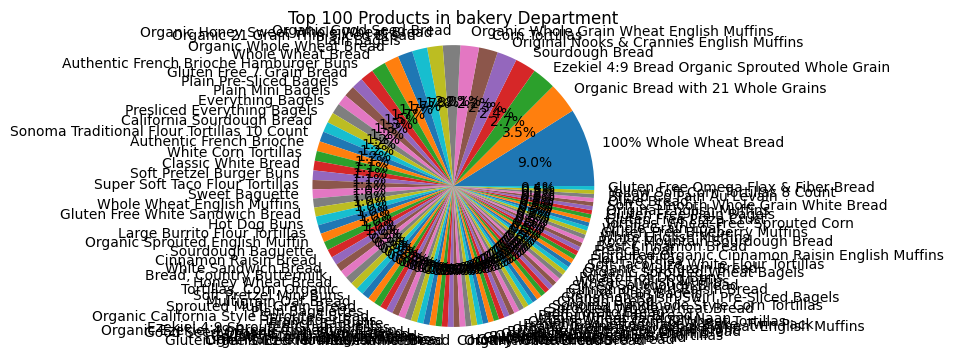

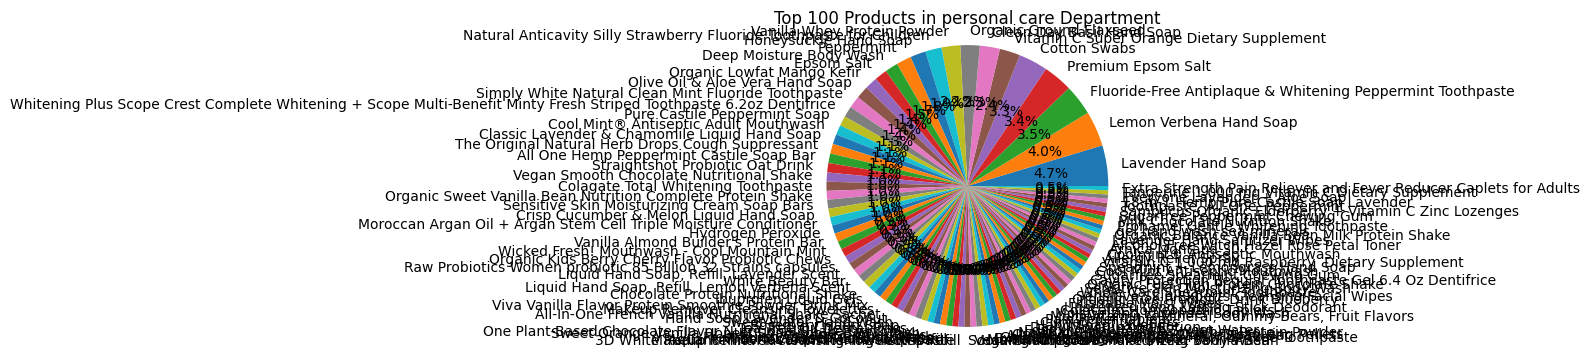

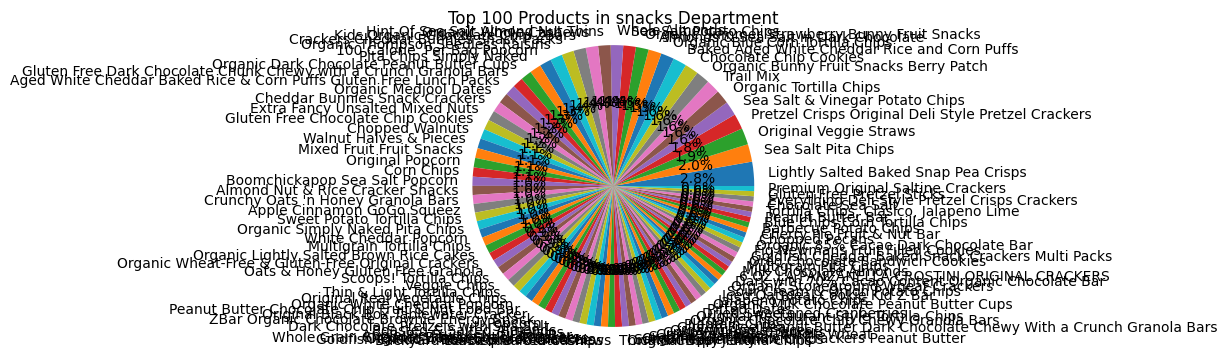

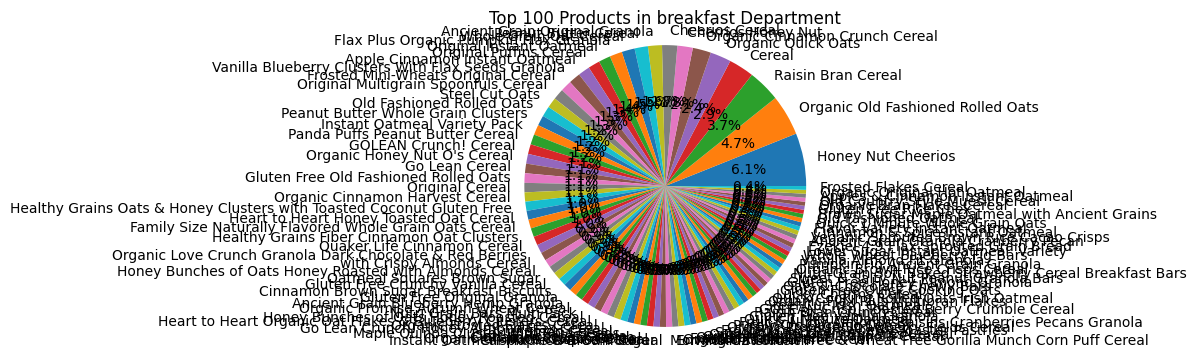

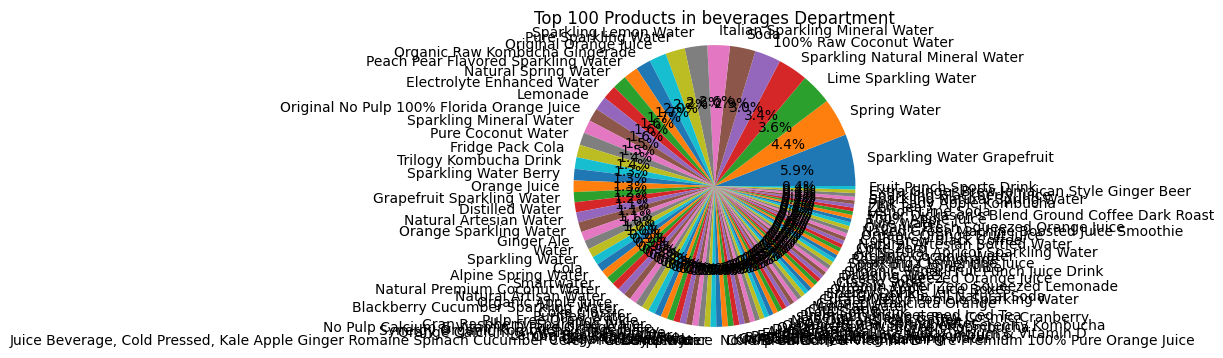

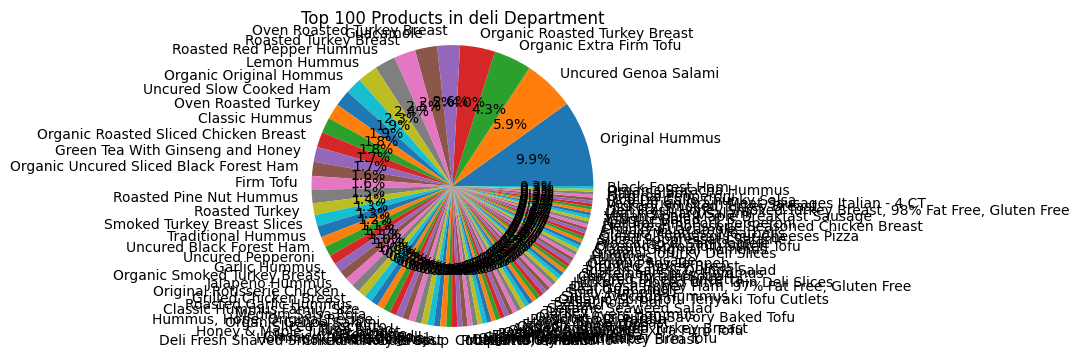

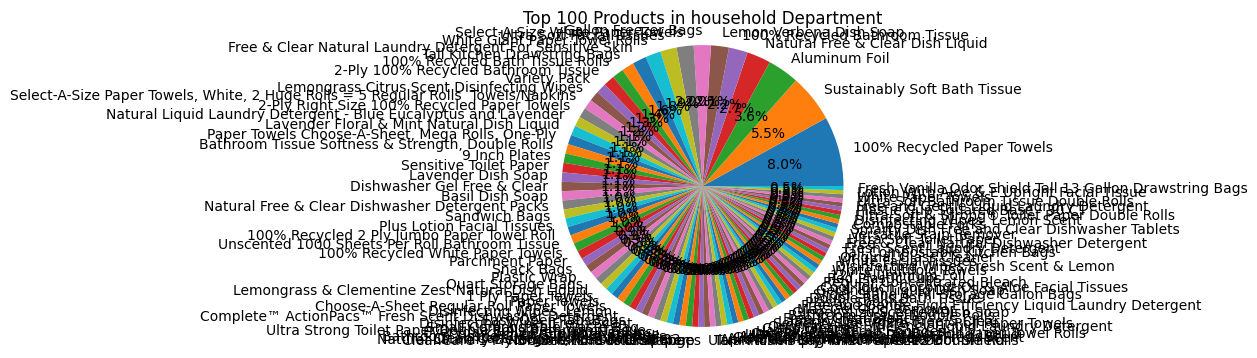

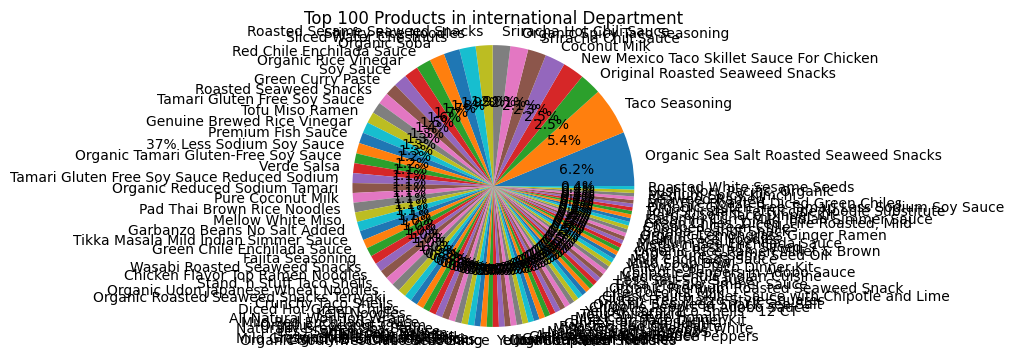

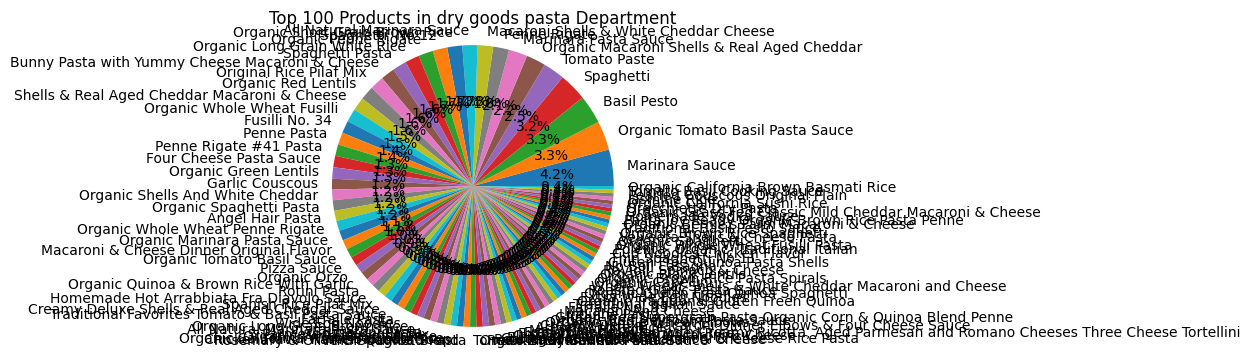

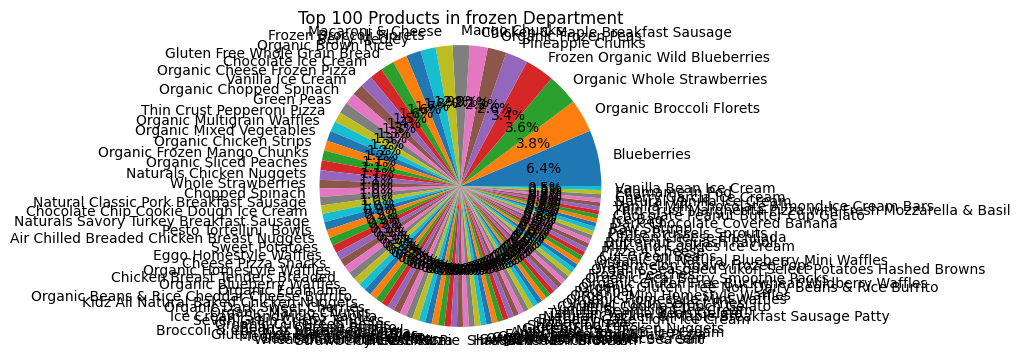

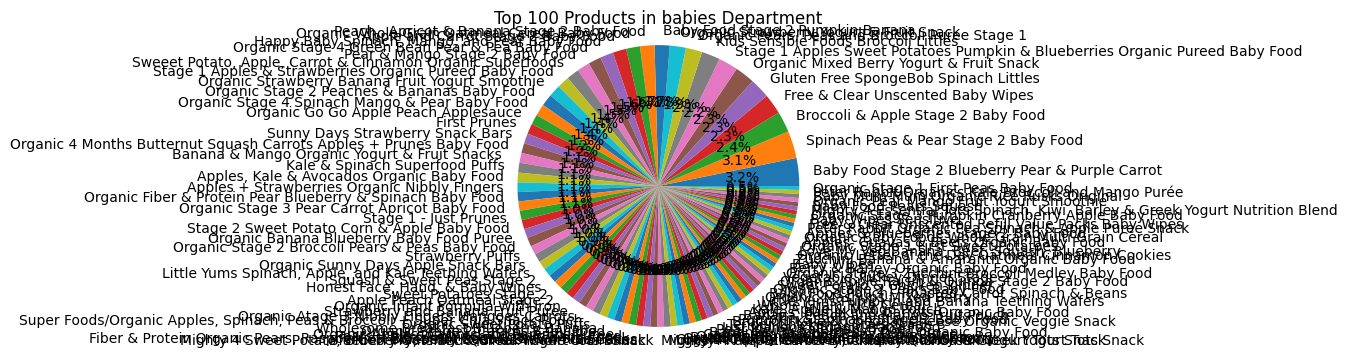

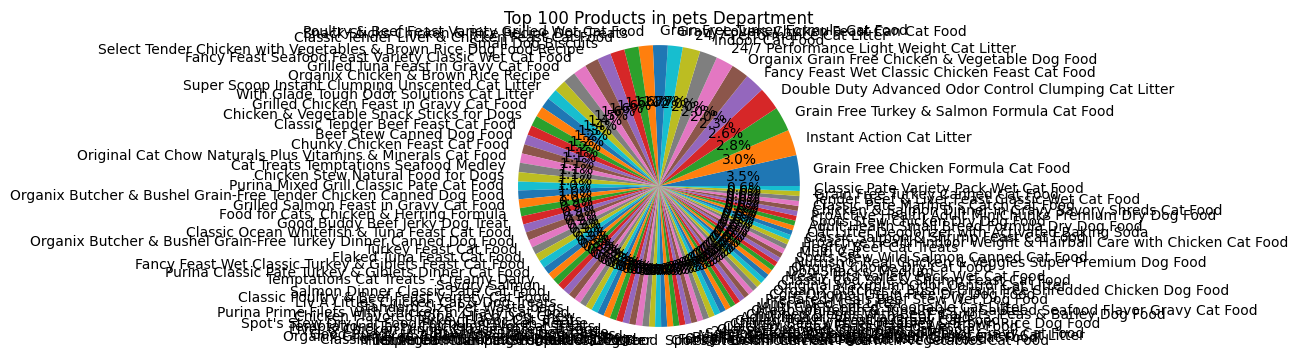

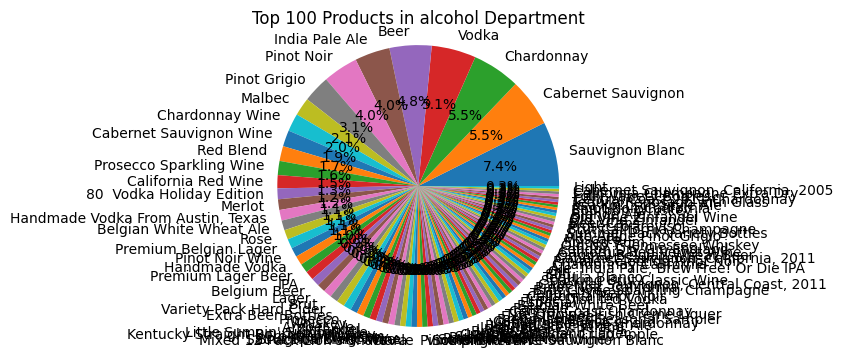

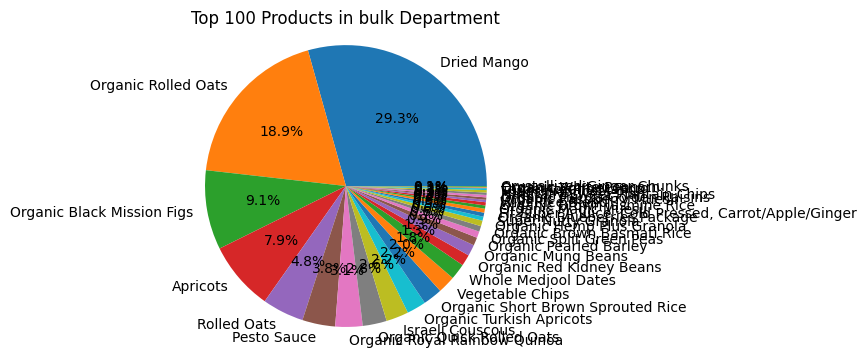

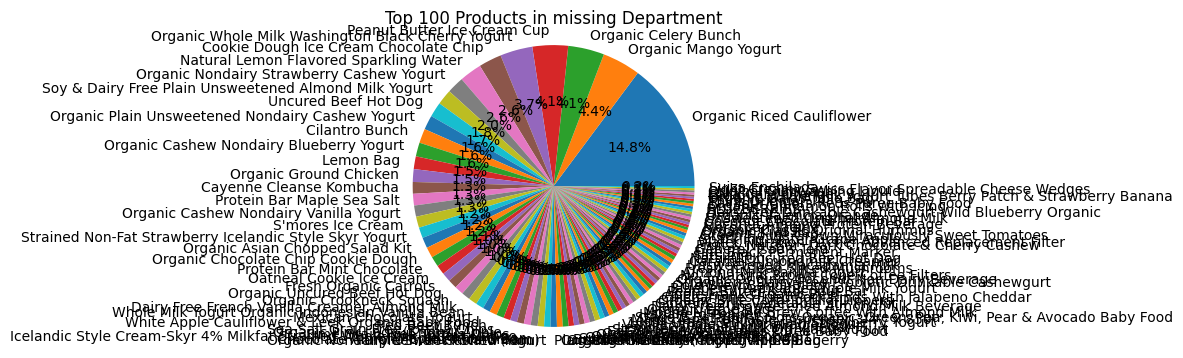

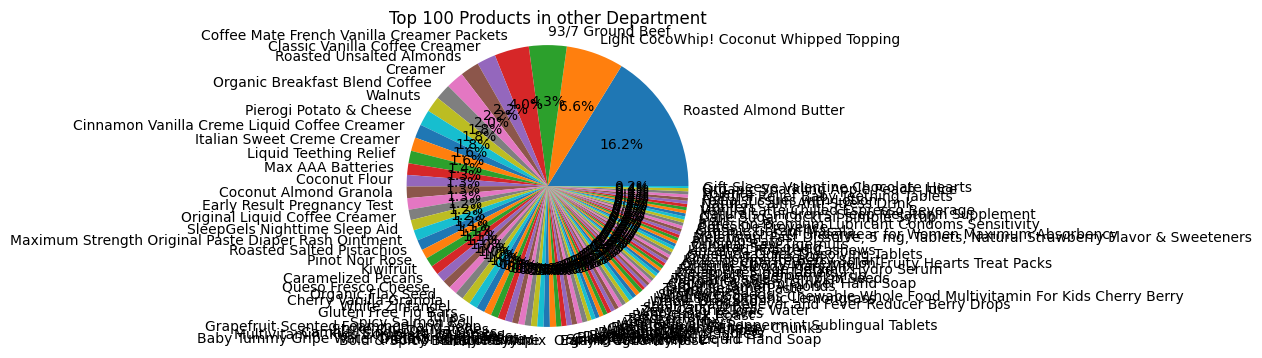

In [ ]:
# Get the unique departments
departments = data['department'].unique()

# Create a directory to save the pie charts
import os
output_directory = "department_pie_charts"
os.makedirs(output_directory, exist_ok=True)

# Loop through each department
for department in departments:
    # Filter data for the current department
    department_data = data[data['department'] == department]

    # Calculate the frequency of each product being ordered in the department
    product_frequencies = department_data['product_id'].value_counts()

    # Sort products by frequency and select the top 100 products
    top_100_products = product_frequencies.head(100).index

    # Create a new DataFrame with only the top 100 products in the department
    top_100_df = department_data[department_data['product_id'].isin(top_100_products)]

    # Calculate product counts
    product_counts = top_100_df['product_name'].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%')
    plt.title(f"Top 100 Products in {department} Department")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Save the pie chart as an image in the output directory
    chart_filename = os.path.join(output_directory, f"{department}_pie_chart.png")
    plt.savefig(chart_filename)

    plt.show()

##Data Prepration
>Performing several essential tasks to ensure that the data is in a suitable format for analysis and modeling.

###Data Cleaning
>Handling missing values, outliers, and inaccuracies in the dataset to ensure data quality.



In [ ]:
# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['number'])
non_numeric_columns = df.select_dtypes(exclude=['number'])

# Count the rows with negative values in numeric columns
negative_rows = (numeric_columns < 0).any(axis=1).sum()

# Count the rows with decimal values in numeric columns
decimal_rows = (numeric_columns % 1 != 0).any(axis=1).sum()

# Count the rows with missing values in non-numeric columns
missing_rows = non_numeric_columns.isnull().any(axis=1).sum()

# Remove rows with negative values in numeric columns
numeric_columns = numeric_columns[(numeric_columns >= 0)]

# Remove rows with decimal values in numeric columns
numeric_columns = numeric_columns[(numeric_columns % 1 == 0)]

# Combine the cleaned numeric and non-numeric columns
df_cleaned = pd.concat([numeric_columns, non_numeric_columns], axis=1)

# Create a statistics DataFrame
statistics_df = pd.DataFrame({
    'Rows with negative values in numeric columns': [negative_rows],
    'Rows with decimal values in numeric columns': [decimal_rows],
    'Rows with missing values in non-numeric columns': [missing_rows]
})

# Apply styling to the statistics DataFrame
styled_statistics_df = statistics_df.style.\
    set_table_styles([{'selector': '', 'props': [('border', '2px solid black')]}])

# Display the styled statistics DataFrame
styled_statistics_df


##Identifying the top 1000 products

>This code selects the top 1000 most selling products across departments

In [ ]:
# Group the data by 'product_name' and count the occurrences
product_counts = data['product_name'].value_counts()

# Get the top 1000 selling products
top_1000_products = product_counts.head(1000)

# Reset the index and add a new column 'Index' starting from 1
top_1000_products = top_1000_products.reset_index()
top_1000_products.index += 1
top_1000_products.columns = ['Index', 'Product Name']

# Print the top 1000 selling products with an index starting from 1
print(top_1000_products)

                                Index  Product Name
1                              Banana         14494
2              Bag of Organic Bananas         11694
3                Organic Strawberries          8081
4                Organic Baby Spinach          7369
5                Organic Hass Avocado          6411
...                               ...           ...
996             Multigrain Pita Chips           166
997   Oreo Chocolate Sandwich Cookies           166
998       Crushed Tomatoes With Basil           165
999     Birthday Cake Light Ice Cream           165
1000                Organic Skim Milk           165

[1000 rows x 2 columns]


##Substitute Product Identification
>Identify potential substitute products for items not available in the "Instabasket" aisle.

### Un-optimized brute force technique for substituting products using Levenshtein
>The Levenshtein distance, also known as the edit distance, is a method for comparing two strings to determine how similar they are. It quantifies the minimum number of single-character edits (insertions, deletions, or substitutions) required to transform one string into another. The smaller the Levenshtein distance, the more similar the strings are.


In [ ]:
pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.9/172.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.8 MB/s eta 0:00:00


>In this approach the time complexity is not at par to compute the data provided. We are Comparing the top selling products with all the product order in the dataset.

In [ ]:
from Levenshtein import distance

# Assuming 'Refrigerated' is an aisle and 'Frozen' is a department
refrigerated_aisle = 'Refrigerated'
frozen_department = 'Frozen'

# Calculate the total number of sales for each product
product_sales = minified_data['product_name'].value_counts()

# Get the top 1000 selling products, including the top 100 frozen and refrigerated items
top_products = product_sales.nlargest(1000).index

# Filter the DataFrame to include only the top 1000 selling products
filtered_df = minified_data[minified_data['product_name'].isin(top_products)]

# Filter the DataFrame to include only the top 1000 selling products overall
top_1000_products = filtered_df

# Function to find the most similar product
def find_most_similar_product(product_name, available_products):
    min_distance = float('inf')
    most_similar_product = None

    for available_product in available_products:
        if available_product != product_name:  # Exclude the same product
            dist = distance(product_name.lower(), available_product.lower())
            if dist < min_distance:
                min_distance = dist
                most_similar_product = available_product

    return most_similar_product

# Create a list of available product names (you should replace this with your actual product names)
available_products = df['product_name'].unique()

# Iterate through the top 1000 products and find the substitutes
substitute_products = []

for _, row in top_1000_products.iterrows():
    item = row['product_name']
    substitute = find_most_similar_product(item, available_products)
    substitute_products.append(substitute)

# Add the substitute products to the DataFrame
top_1000_products['substitute_product'] = substitute_products
top_1000_products.reset_index(drop=True)
# top_1000_products.index = range(1, len(product_sales) + 1)
# Display the DataFrame with substitutes for the top 1000 products
print(top_1000_products[['product_name', 'substitute_product']])

                          product_name             substitute_product
2                Organic Celery Hearts            Organic Celery Salt
3                       Cucumber Kirby                       Cucumber
5               Bag of Organic Bananas          Bag of Organic Lemons
6                 Organic Hass Avocado       Organic Hass Avocado Bag
7          Organic Whole String Cheese          Organic String Cheese
...                                ...                            ...
10019             Organic Hass Avocado       Organic Hass Avocado Bag
10020               Organic Whole Milk            Organic  Whole Milk
10021  Organic Unsweetened Almond Milk  Organic Sweetened Almond Milk
10022               Organic Egg Whites           Organic Veggie Bites
10023                   Organic Celery                   Organic Kale

[5946 rows x 2 columns]


<ipython-input-4-e3dbe95b3657>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000_products['substitute_product'] = substitute_products


>In this approach the time complexity is **slightly improved** but still not at par to compute the data provided. Now we are comparing the top selling products with all the product orders in the dataset excluding the top selling product orders, therefore reducing the size of the data to be compared.

In [ ]:
from Levenshtein import distance

# Assuming 'Refrigerated' is an aisle and 'Frozen' is a department
refrigerated_aisle = 'Refrigerated'
frozen_department = 'Frozen'

# Calculate the total number of sales for each product
product_sales = minified_data['product_name'].value_counts()

# Get the top 1000 selling products, including the top 100 frozen and refrigerated items
top_products = product_sales.nlargest(1000).index

# Filter the DataFrame to include only the top 1000 selling products
filtered_df = minified_data[minified_data['product_name'].isin(top_products)]

# Create a new DataFrame for available products without the top 1000 selling products
available_products = minified_data[~minified_data['product_name'].isin(top_products)]

# Group the available_products DataFrame by product_name
available_products_grouped = available_products.groupby('product_name')['aisle'].first().reset_index()

# Create a dictionary to store product_name to aisle mapping for available products
product_aisle_dict = dict(zip(available_products_grouped['product_name'], available_products_grouped['aisle']))

# Function to find the most similar product from the same aisle
def find_most_similar_product(product_name, item_aisle, available_aisles, available_products):
    min_distance = float('inf')
    most_similar_product = None

    for available_product in available_products:
        available_product_aisle = available_aisles[available_product]
        if available_product_aisle == item_aisle:
            dist = distance(product_name.lower(), available_product.lower())
            if dist < min_distance:
                min_distance = dist
                most_similar_product = available_product

    return most_similar_product

# Create a list of available product names (from the available_products_grouped DataFrame)
available_product_names = available_products_grouped['product_name'].unique()
available_aisles = product_aisle_dict

# Iterate through the top 1000 products and find the substitutes from the same aisle
substitute_products = []

for _, row in filtered_df.iterrows():
    item = row['product_name']
    item_aisle = row['aisle']

    substitute = find_most_similar_product(item, item_aisle, available_aisles, available_product_names)
    substitute_products.append(substitute)

# Add the substitute products to the filtered_df DataFrame
filtered_df['substitute_product'] = substitute_products

# Display the DataFrame with substitutes for the top 1000 products
print(filtered_df[['product_name', 'substitute_product']])


                          product_name                     substitute_product
2                Organic Celery Hearts                       Organic Currants
3                       Cucumber Kirby                                 Celery
5               Bag of Organic Bananas                  Bag of Organic Lemons
6                 Organic Hass Avocado                          Organic Mango
7          Organic Whole String Cheese                  Organic String Cheese
...                                ...                                    ...
10019             Organic Hass Avocado                          Organic Mango
10020               Organic Whole Milk                    Organic  Whole Milk
10021  Organic Unsweetened Almond Milk  Organic Unsweetened Soy Milk Beverage
10022               Organic Egg Whites                     Organic Eggs Large
10023                   Organic Celery                           Organic Leek

[5946 rows x 2 columns]


<ipython-input-6-d535647f84d6>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['substitute_product'] = substitute_products


###Using Grouping techniques for finding better substitutes


>Obtaining top 1000 products for grouping

In [ ]:
# Group the data by 'product_name' and count the occurrences
product_counts = data['product_name'].value_counts()

# Get the top 1000 selling products
top_1000_products = product_counts.head(1000)

# Reset the index and add a new column 'Index' starting from 1
top_1000_products = top_1000_products.reset_index()
top_1000_products.index += 1
top_1000_products.columns = ['Index', 'Product Name']

# Print the top 1000 selling products with an index starting from 1
print(top_1000_products)

                                Index  Product Name
1                              Banana         14494
2              Bag of Organic Bananas         11694
3                Organic Strawberries          8081
4                Organic Baby Spinach          7369
5                Organic Hass Avocado          6411
...                               ...           ...
996             Multigrain Pita Chips           166
997   Oreo Chocolate Sandwich Cookies           166
998       Crushed Tomatoes With Basil           165
999     Birthday Cake Light Ice Cream           165
1000                Organic Skim Milk           165

[1000 rows x 2 columns]


>Simple grouping with respect to the first string available to compare. Here the issue is that same products are appearing in multiple groups.

In [ ]:
# Group the data by 'product_name' and count the occurrences
product_counts = data['product_name'].value_counts()

# Get the top 1000 selling products
top_1000_products = product_counts.head(1000)

# Reset the index and add a new column 'Index' starting from 1
top_1000_products = top_1000_products.reset_index()
top_1000_products.index += 1
top_1000_products.columns = ['Product Name', 'Count']

# Create a dictionary to store grouped product names
grouped_names = {}

# Define a function to group similar product names
def group_similar_names(product_name):
    # You can implement your logic to group similar names here
    # For this example, let's group by the first word in the product name
    words = product_name.split()
    group_key = words[0] if len(words) > 0 else product_name
    return group_key

# Iterate through the top 1000 products and group them
for index, row in top_1000_products.iterrows():
    product_name = row['Product Name']
    group_key = group_similar_names(product_name)
    if group_key in grouped_names:
        grouped_names[group_key].append(product_name)
    else:
        grouped_names[group_key] = [product_name]

# Create a new DataFrame to store the grouped names
grouped_products = pd.DataFrame({'Group': list(grouped_names.keys()), 'Products': list(grouped_names.values())})

# Print the table of grouped product names
print(grouped_products)

            Group                                           Products
0          Banana                                           [Banana]
1             Bag  [Bag of Organic Bananas, Bag of Organic Fuji A...
2         Organic  [Organic Strawberries, Organic Baby Spinach, O...
3           Large  [Large Lemon, Large Alfresco Eggs, Large Grape...
4    Strawberries                                     [Strawberries]
..            ...                                                ...
494        Newman        [Newman O's Creme Filled Chocolate Cookies]
495     Smartfood           [Smartfood White Cheddar Cheese Popcorn]
496          Toll          [Toll House Semi-Sweet Chocolate Morsels]
497        Deluxe                              [Deluxe Plain Bagels]
498        Hearts                                [Hearts Of Romaine]

[499 rows x 2 columns]


>Enhanced grouping with respect to the first string available to compare making sure that one product is only present in one group. Moreover grouping in done on the basis of the **main noun** present in the product name.

In [ ]:
import tabulate
import warnings

# Suppress Python warnings
warnings.filterwarnings("ignore")

# Group the data by 'product_name' and count the occurrences
product_counts = data['product_name'].value_counts()

# Get the top 1000 selling products
top_1000_products = product_counts.head(1000)

# Reset the index and add a new column 'Index' starting from 1
top_1000_products = top_1000_products.reset_index()
top_1000_products.index += 1
top_1000_products.columns = ['Product Name', 'Count']

# Create a dictionary to track which product belongs to which group
product_to_group = {}

# Define a function to extract the main noun from the product name
def extract_main_noun(product_name):
    # You can implement your logic to extract the main noun here
    # For this example, let's extract the last word in the product name
    words = product_name.split()
    main_noun = words[-1] if len(words) > 0 else product_name
    return main_noun

# Create an empty dictionary to store groups
groups = {}

# Iterate through the top 1000 products and group them
for index, row in top_1000_products.iterrows():
    product_name = row['Product Name']
    main_noun = extract_main_noun(product_name)

    # Check if the product is already in a group
    if product_name in product_to_group:
        group_key = product_to_group[product_name]
    else:
        # Check if a group with the same main noun exists
        if main_noun in groups:
            group_key = main_noun
        else:
            # Create a new group for the main noun
            groups[main_noun] = pd.DataFrame(columns=['Index', 'Product Name', 'Count'])
            group_key = main_noun

        product_to_group[product_name] = group_key

    # Append the product to the group along with its count
    groups[group_key] = groups[group_key].append({'Index': index, 'Product Name': product_name, 'Count': row['Count']}, ignore_index=True)

# Print each group in a formatted tabular style
for group_key, group_data in groups.items():
    print(f"Group '{group_key}':\n")
    table = tabulate.tabulate(group_data, headers='keys', tablefmt='pretty', showindex=False)
    print(table)
    print("\n")

##Final solution







###We are filtering out top 100 selling products from  Frozen Department and grouping them.

In [ ]:
import tabulate
import warnings

# Suppress Python warnings
warnings.filterwarnings("ignore")

# Filter the data for products in the 'Frozen' department
frozen_data = data[data['department'] == 'frozen']

# Group the data by 'product_name' and count the occurrences
product_counts = frozen_data['product_name'].value_counts()

# Get the top 1500 selling products from the 'Frozen' department
top_100_products = product_counts.head(100)

# Reset the index and add a new column 'Index' starting from 1
top_100_products = top_100_products.reset_index()
top_100_products.index += 1
top_100_products.columns = ['Product Name', 'Count']

# Create a dictionary to track which product belongs to which group
product_to_group = {}

# Define a function to extract the main noun from the product name
def extract_main_noun(product_name):
    # You can implement your logic to extract the main noun here
    # For this example, let's extract the last word in the product name
    words = product_name.split()
    main_noun = words[-1] if len(words) > 0 else product_name
    return main_noun

# Create an empty dictionary to store groups
groups = {}

# Iterate through the top 100 products and group them
for index, row in top_100_products.iterrows():
    product_name = row['Product Name']
    main_noun = extract_main_noun(product_name)

    # Check if the product is already in a group
    if product_name in product_to_group:
        group_key = product_to_group[product_name]
    else:
        # Check if a group with the same main noun exists
        if main_noun in groups:
            group_key = main_noun
        else:
            # Create a new group for the main noun
            groups[main_noun] = pd.DataFrame(columns=['Index', 'Product Name', 'Count'])
            group_key = main_noun

        product_to_group[product_name] = group_key

    # Append the product to the group along with its count
    groups[group_key] = groups[group_key].append({'Index': index, 'Product Name': product_name, 'Count': row['Count']}, ignore_index=True)

# Print each group in a formatted tabular style
for group_key, group_data in groups.items():
    print(f"Group '{group_key}':\n")
    table = tabulate.tabulate(group_data, headers='keys', tablefmt='pretty', showindex=False)
    print(table)
    print("\n")


Group 'Blueberries':

+-------+---------------------------------+-------+
| Index |          Product Name           | Count |
+-------+---------------------------------+-------+
|   1   |           Blueberries           | 1759  |
|   4   | Frozen Organic Wild Blueberries |  921  |
+-------+---------------------------------+-------+


Group 'Florets':

+-------+--------------------------+-------+
| Index |       Product Name       | Count |
+-------+--------------------------+-------+
|   2   | Organic Broccoli Florets | 1040  |
|  10   | Frozen Broccoli Florets  |  483  |
+-------+--------------------------+-------+


Group 'Strawberries':

+-------+----------------------------+-------+
| Index |        Product Name        | Count |
+-------+----------------------------+-------+
|   3   | Organic Whole Strawberries |  983  |
|  26   |     Whole Strawberries     |  270  |
+-------+----------------------------+-------+


Group 'Chunks':

+-------+-----------------------------+-------+
| 

### We are filtering out top 100 selling products from  Refrigerated Aisle and grouping them.

In [3]:
import tabulate
import warnings

# Suppress Python warnings
warnings.filterwarnings("ignore")

# Filter the data for products in the 'Refrigerated' aisle or 'Refrigerated Pudding Desserts' aisle
refrigerated_data = data[data['aisle'].isin(['refrigerated', 'Refrigerated Pudding Desserts'])]

# Group the data by 'product_name' and count the occurrences
product_counts = refrigerated_data['product_name'].value_counts()

# Get the top 100 selling products from the 'Refrigerated' aisle
top_100_refrigerated_products = product_counts.head(100)

# Reset the index and add a new column 'Rank' starting from 1
top_100_refrigerated_products = top_100_refrigerated_products.reset_index()
top_100_refrigerated_products.index += 1
top_100_refrigerated_products.columns = ['Product Name', 'Count']

# Create a dictionary to track which product belongs to which group
product_to_group = {}

# Define a function to extract the main noun from the product name
def extract_main_noun(product_name):
    # You can implement your logic to extract the main noun here
    # For this example, let's extract the last word in the product name
    words = product_name.split()
    main_noun = words[-1] if len(words) > 0 else product_name
    return main_noun

# Create an empty dictionary to store groups
groups = {}

# Iterate through the top 100 products and group them
for index, row in top_100_refrigerated_products.iterrows():
    product_name = row['Product Name']
    main_noun = extract_main_noun(product_name)

    # Check if the product is already in a group
    if product_name in product_to_group:
        group_key = product_to_group[product_name]
    else:
        # Check if a group with the same main noun exists
        if main_noun in groups:
            group_key = main_noun
        else:
            # Create a new group for the main noun
            groups[main_noun] = pd.DataFrame(columns=['Index', 'Product Name', 'Count'])
            group_key = main_noun

        product_to_group[product_name] = group_key

    # Append the product to the group along with its count
    groups[group_key] = groups[group_key].append({'Index': index, 'Product Name': product_name, 'Count': row['Count']}, ignore_index=True)

# Print each group in a formatted tabular style
for group_key, group_data in groups.items():
    print(f"Group '{group_key}':\n")
    table = tabulate.tabulate(group_data, headers='keys', tablefmt='pretty', showindex=False)
    print(table)
    print("\n")


Group 'Water':

+-------+------------------------------------------------------+-------+
| Index |                     Product Name                     | Count |
+-------+------------------------------------------------------+-------+
|   1   |                100% Raw Coconut Water                | 1142  |
|  28   | Cold-pressed, Deliciously Hydrating Watermelon Water |  124  |
+-------+------------------------------------------------------+-------+


Group 'Juice':

+-------+-----------------------------------------------------------------------------------+-------+
| Index |                                   Product Name                                    | Count |
+-------+-----------------------------------------------------------------------------------+-------+
|   2   |                               Original Orange Juice                               |  752  |
|   5   |                    Original No Pulp 100% Florida Orange Juice                     |  577  |
|   7   |         

### We are filtering out top 800 selling products from the dataset which are **not from** Frozen Department or Refrigerated Aisle and grouping them.

In [4]:
import tabulate
import warnings

# Suppress Python warnings
warnings.filterwarnings("ignore")

# Filter the data for products NOT in the 'Frozen' department and NOT in the 'Refrigerated' aisle
other_data = data[~((data['department'] == 'frozen') | (data['aisle'].isin(['refrigerated', 'Refrigerated Pudding Desserts'])))]

# Group the data by 'product_name' and count the occurrences
product_counts = other_data['product_name'].value_counts()

# Get the top 100 selling products from the other items
top_800_other_products = product_counts.head(800)

# Reset the index and add a new column 'Rank' starting from 1
top_800_other_products = top_800_other_products.reset_index()
top_800_other_products.index += 1
top_800_other_products.columns = ['Product Name', 'Count']

# Create a dictionary to track which product belongs to which group
product_to_group = {}

# Define a function to extract the main noun from the product name
def extract_main_noun(product_name):
    # You can implement your logic to extract the main noun here
    # For this example, let's extract the last word in the product name
    words = product_name.split()
    main_noun = words[-1] if len(words) > 0 else product_name
    return main_noun

# Create an empty dictionary to store groups
groups = {}

# Iterate through the top 100 products and group them
for index, row in top_800_other_products.iterrows():
    product_name = row['Product Name']
    main_noun = extract_main_noun(product_name)

    # Check if the product is already in a group
    if product_name in product_to_group:
        group_key = product_to_group[product_name]
    else:
        # Check if a group with the same main noun exists
        if main_noun in groups:
            group_key = main_noun
        else:
            # Create a new group for the main noun
            groups[main_noun] = pd.DataFrame(columns=['Index', 'Product Name', 'Count'])
            group_key = main_noun

        product_to_group[product_name] = group_key

    # Append the product to the group along with its count
    groups[group_key] = groups[group_key].append({'Index': index, 'Product Name': product_name, 'Count': row['Count']}, ignore_index=True)

# Print each group in a formatted tabular style
for group_key, group_data in groups.items():
    print(f"Group '{group_key}':\n")
    table = tabulate.tabulate(group_data, headers='keys', tablefmt='pretty', showindex=False)
    print(table)
    print("\n")


Group 'Banana':

+-------+----------------+-------+
| Index |  Product Name  | Count |
+-------+----------------+-------+
|   1   |     Banana     | 14494 |
|  164  | Organic Banana |  644  |
+-------+----------------+-------+


Group 'Bananas':

+-------+------------------------+-------+
| Index |      Product Name      | Count |
+-------+------------------------+-------+
|   2   | Bag of Organic Bananas | 11694 |
+-------+------------------------+-------+


Group 'Strawberries':

+-------+----------------------+-------+
| Index |     Product Name     | Count |
+-------+----------------------+-------+
|   3   | Organic Strawberries | 8081  |
|   8   |     Strawberries     | 4340  |
+-------+----------------------+-------+


Group 'Spinach':

+-------+----------------------+-------+
| Index |     Product Name     | Count |
+-------+----------------------+-------+
|   4   | Organic Baby Spinach | 7369  |
|  147  |     Baby Spinach     |  703  |
|  233  |       Spinach        |  487  |
+

###Combining all the dataframes

> Here we combine top 100 frozen, top 100 refrigerated, top 800 (other than frozen, refrigerated) product information dataframes to get all the possible groups.



In [ ]:
import tabulate
import warnings

# Suppress Python warnings
warnings.filterwarnings("ignore")

# Filter the data for products in the 'Frozen' department
frozen_data = data[data['department'] == 'frozen']

# Group the data by 'product_name' and count the occurrences
product_counts = frozen_data['product_name'].value_counts()

# Get the top 100 selling products from the 'Frozen' department
top_100_products = product_counts.head(100)

# Reset the index and add a new column 'Index' starting from 1
top_100_products = top_100_products.reset_index()
top_100_products.index += 1
top_100_products.columns = ['Product Name', 'Count']

# Filter the data for products in the 'Refrigerated' aisle
refrigerated_data = data[data['aisle'].isin(['refrigerated', 'Refrigerated Pudding Desserts'])]

# Group the data by 'product_name' and count the occurrences
product_counts = refrigerated_data['product_name'].value_counts()

# Get the top 100 selling products from the 'Refrigerated' aisle
top_100_refrigerated_products = product_counts.head(100)

# Reset the index and add a new column 'Rank' starting from 1
top_100_refrigerated_products = top_100_refrigerated_products.reset_index()
top_100_refrigerated_products.index += 1
top_100_refrigerated_products.columns = ['Product Name', 'Count']

# Filter the data for products NOT in the 'Frozen' department and NOT in the 'Refrigerated' aisle
other_data = data[~((data['department'] == 'frozen') | (data['aisle'].isin(['refrigerated', 'Refrigerated Pudding Desserts'])))]

# Group the data by 'product_name' and count the occurrences
product_counts = other_data['product_name'].value_counts()

# Get the top 800 selling products from the other items
top_800_other_products = product_counts.head(800)

# Reset the index and add a new column 'Rank' starting from 1
top_800_other_products = top_800_other_products.reset_index()
top_800_other_products.index += 1
top_800_other_products.columns = ['Product Name', 'Count']

# Concatenate the three dataframes vertically (row-wise)
merged_top_products = pd.concat([top_800_other_products, top_100_refrigerated_products, top_100_products])

# Reset the index of the merged dataframe
merged_top_products.reset_index(drop=True, inplace=True)

# Create a dictionary to track which product belongs to which group
product_to_group = {}

# Define a function to extract the main noun from the product name
def extract_main_noun(product_name):
    # You can implement your logic to extract the main noun here
    # For this example, let's extract the last word in the product name
    words = product_name.split()
    main_noun = words[-1] if len(words) > 0 else product_name
    return main_noun

# Create an empty dictionary to store groups
groups = {}

# Iterate through the top 1000 products and group them
for index, row in merged_top_products.iterrows():
    product_name = row['Product Name']
    main_noun = extract_main_noun(product_name)

    # Check if the product is already in a group
    if product_name in product_to_group:
        group_key = product_to_group[product_name]
    else:
        # Check if a group with the same main noun exists
        if main_noun in groups:
            group_key = main_noun
        else:
            # Create a new group for the main noun
            groups[main_noun] = pd.DataFrame(columns=['Index', 'Product Name', 'Count'])
            group_key = main_noun

        product_to_group[product_name] = group_key

    # Append the product to the group along with its count
    groups[group_key] = groups[group_key].append({'Index': index, 'Product Name': product_name, 'Count': row['Count']}, ignore_index=True)

# Print each group in a formatted tabular style
for group_key, group_data in groups.items():
    print(f"Group '{group_key}':\n")
    table = tabulate.tabulate(group_data, headers='keys', tablefmt='pretty', showindex=False)
    print(table)
    print("\n")

###Here we have a final list of our top 1000 products, which satisfy all the problem constraints.

In [12]:
import warnings
import os
import pandas as pd
from tabulate import tabulate

# Suppress Python warnings
warnings.filterwarnings("ignore")

# Filter the data for products in the 'Frozen' department
frozen_data = data[data['department'] == 'frozen']

# Group the data by 'product_id', 'product_name', 'aisle', 'aisle_id', and count the occurrences
product_counts = frozen_data.groupby(['product_id', 'product_name', 'aisle', 'aisle_id', 'department', 'department_id']).size().reset_index(name='count')

# Sort by count in descending order to get the top 100 products
top_100_products = product_counts.sort_values(by='count', ascending=False).head(100)

# Filter the data for products in the 'Refrigerated' aisle
refrigerated_data = data[data['aisle'].isin(['refrigerated', 'Refrigerated Pudding Desserts'])]

# Group the data by 'product_name' and count the occurrences
product_counts = refrigerated_data.groupby(['product_id', 'product_name', 'aisle', 'aisle_id', 'department', 'department_id']).size().reset_index(name='count')

# Get the top 100 selling products from the 'Refrigerated' aisle
top_100_refrigerated_products = product_counts.sort_values(by='count', ascending=False).head(100)

# Filter the data for products NOT in the 'Frozen' department and NOT in the 'Refrigerated' aisle
other_data = data[~((data['department'] == 'frozen') | (data['aisle'].isin(['refrigerated', 'Refrigerated Pudding Desserts'])))]

# Group the data by 'product_name' and count the occurrences
product_counts = other_data.groupby(['product_id', 'product_name', 'aisle', 'aisle_id', 'department', 'department_id']).size().reset_index(name='count')

# Get the top 100 selling products from the other items
top_100_other_products = product_counts.sort_values(by='count', ascending=False).head(800)

# Concatenate the three dataframes vertically (row-wise)
merged_top_products = pd.concat([top_100_other_products, top_100_refrigerated_products, top_100_products])

# Reset the index of the merged dataframe
merged_top_products = merged_top_products.reset_index(drop=True)
merged_top_products.index = range(1, len(merged_top_products) + 1)
merged_top_products = merged_top_products.rename_axis('index')

# Print the table in a presentable manner
table = tabulate(merged_top_products, headers='keys', tablefmt='pretty', showindex=True)
print(table)

# Save the table to a CSV file
merged_top_products.to_csv("final-1000-products-with-columns.csv")


+-------+------------+-----------------------------------------------------------------------------------------------+-------------------------------+----------+-----------------+---------------+-------+
| index | product_id |                                         product_name                                          |             aisle             | aisle_id |   department    | department_id | count |
+-------+------------+-----------------------------------------------------------------------------------------------+-------------------------------+----------+-----------------+---------------+-------+
|   1   |   24852    |                                            Banana                                             |         fresh fruits          |    24    |     produce     |       4       | 14494 |
|   2   |   13176    |                                    Bag of Organic Bananas                                     |         fresh fruits          |    24    |     produce     |     

###Percentage of orders completed without substitution

> Code calculates percentage of completion of indivisual order by comparing product name given in MM&A's list vs Top 1000 products analysed above.

In [7]:
import pandas as pd

# Load CSV files into DataFrames
df2 = pd.read_csv('/content/final-1000-products-with-columns.csv')

# Create a dictionary to map product names to their counts in CSV 2
product_counts = dict(zip(df2['product_name'], df2['count']))

# Initialize an empty list to store order completion percentages
order_completion_percentages = []

# Iterate through unique order IDs in CSV 1
unique_order_ids = df1['order_id'].unique()
for order_id in unique_order_ids:
    # Filter CSV 1 for the current order ID
    order_df = df1[df1['order_id'] == order_id]

    # Initialize variables to keep track of available and total products in the order
    available_products = 0
    total_products = len(order_df)

    # Check if each product in the order is available in CSV 2
    for _, row in order_df.iterrows():
        product_name = row['product_name']
        if product_name in product_counts and product_counts[product_name] > 0:
            available_products += 1
            product_counts[product_name] -= 1

    # Calculate the order completion percentage
    order_completion_percentage = (available_products / total_products) * 100

    # Append the order completion percentage to the list
    order_completion_percentages.append(order_completion_percentage)

# Create a new DataFrame to store the order completion percentages
result_df = pd.DataFrame({'order_id': unique_order_ids, 'order_completion_percentage': order_completion_percentages})

# Print or save the result as needed
print(result_df)


       order_id  order_completion_percentage
0             1                    62.500000
1             2                    44.444444
2             3                    62.500000
3             4                    23.076923
4             5                    38.461538
...         ...                          ...
97828     99996                    75.000000
97829     99997                    78.947368
97830     99998                     0.000000
97831     99999                    25.000000
97832    100000                    73.333333

[97833 rows x 2 columns]


###Average percentage of orders completed without substitution

In [ ]:
import pandas as pd

# Load CSV files into DataFrames
df2 = pd.read_csv('/content/final-1000-products-with-columns.csv')

# Create a dictionary to map product names to their counts in CSV 2
product_counts = dict(zip(df2['product_name'], df2['count']))

# Initialize an empty list to store order completion percentages
order_completion_percentages = []

# Iterate through unique order IDs in CSV 1
unique_order_ids = df1['order_id'].unique()
for order_id in unique_order_ids:
    # Filter CSV 1 for the current order ID
    order_df = df1[df1['order_id'] == order_id]

    # Initialize variables to keep track of available and total products in the order
    available_products = 0
    total_products = len(order_df)

    # Check if each product in the order is available in CSV 2
    for _, row in order_df.iterrows():
        product_name = row['product_name']
        if product_name in product_counts and product_counts[product_name] > 0:
            available_products += 1
            # product_counts[product_name] -= 1

    # Calculate the order completion percentage
    order_completion_percentage = (available_products / total_products) * 100

    # Append the order completion percentage to the list
    order_completion_percentages.append(order_completion_percentage)

# Create a new DataFrame to store the order completion percentages
result_df = pd.DataFrame({'order_id': unique_order_ids, 'order_completion_percentage': order_completion_percentages})

# Calculate the average percentage of orders completed
average_order_completion_percentage = result_df['order_completion_percentage'].mean()

# Print the average percentage
print("Average Percentage of Orders Completed:", average_order_completion_percentage)


Average Percentage of Orders Completed: 52.71144581249565


###Added an addition group_name column
>Code adds a column "group_name" in the Top 1000 list created above.



In [ ]:
import tabulate
import warnings
import os

# Suppress Python warnings
warnings.filterwarnings("ignore")

# Function to extract the main noun from the product name
def extract_main_noun(product_name):
    words = product_name.split()
    # For this example, let's extract the last word in the product name
    main_noun = words[-1] if len(words) > 0 else product_name
    return main_noun

# Filter the data for products in the 'Frozen' department
frozen_data = data[data['department'] == 'frozen']

# Group the data by 'product_id', 'product_name', 'aisle', 'aisle_id', and count the occurrences
product_counts = frozen_data.groupby(['product_id', 'product_name', 'aisle', 'aisle_id', 'department', 'department_id']).size().reset_index(name='count')

# Sort by count in descending order to get the top 100 products
top_100_products = product_counts.sort_values(by='count', ascending=False).head(100)

# Extract the main noun from product names and add a 'group_name' column
top_100_products['group_name'] = top_100_products['product_name'].apply(extract_main_noun)

# Filter the data for products in the 'Refrigerated' aisle
refrigerated_data = data[data['aisle'] == 'refrigerated']

# Group the data by 'product_name' and count the occurrences
product_counts = refrigerated_data.groupby(['product_id', 'product_name', 'aisle', 'aisle_id', 'department', 'department_id']).size().reset_index(name='count')

# Get the top 100 selling products from the 'Refrigerated' aisle
top_100_refrigerated_products = product_counts.sort_values(by='count', ascending=False).head(100)

# Extract the main noun from product names and add a 'group_name' column
top_100_refrigerated_products['group_name'] = top_100_refrigerated_products['product_name'].apply(extract_main_noun)

# Filter the data for products NOT in the 'Frozen' department and NOT in the 'Refrigerated' aisle
other_data = data[~((data['department'] == 'frozen') | (data['aisle'] == 'refrigerated'))]

# Group the data by 'product_name' and count the occurrences
product_counts = other_data.groupby(['product_id', 'product_name', 'aisle', 'aisle_id', 'department', 'department_id']).size().reset_index(name='count')

# Get the top 800 selling products from the other items
top_100_other_products = product_counts.sort_values(by='count', ascending=False).head(800)

# Extract the main noun from product names and add a 'group_name' column
top_100_other_products['group_name'] = top_100_other_products['product_name'].apply(extract_main_noun)

# Concatenate the three dataframes vertically (row-wise)
merged_top_products = pd.concat([top_100_other_products, top_100_refrigerated_products, top_100_products])

# Reset the index of the merged dataframe
merged_top_products = merged_top_products.reset_index(drop=True)
merged_top_products.index = range(1, len(merged_top_products) + 1)
merged_top_products = merged_top_products.rename_axis('index')
print(merged_top_products)

# Save the merged DataFrame to a CSV file
merged_top_products.to_csv("top-1000-products-with-groups.csv")


       product_id                                  product_name  \
index                                                             
1           24852                                        Banana   
2           13176                        Bag of Organic Bananas   
3           21137                          Organic Strawberries   
4           21903                          Organic Baby Spinach   
5           47209                          Organic Hass Avocado   
...           ...                                           ...   
996          8638  Vanilla Milk Chocolate Almond Ice Cream Bars   
997          4932                        Vanilla Bean Ice Cream   
998         45061                     Natural Vanilla Ice Cream   
999         39024                                Edamame In Pod   
1000        47993                       Cherry Garcia Ice Cream   

                            aisle  aisle_id department  department_id  count  \
index                                           

>Code adds a column "group_name" in the MM&A's dataset csv.





In [ ]:
import pandas as pd
import warnings

# Suppress Python warnings
warnings.filterwarnings("ignore")

# Function to extract the main noun from the product name
def extract_main_noun(product_name):
    words = product_name.split()
    # For this example, let's extract the last word in the product name
    main_noun = words[-1] if len(words) > 0 else product_name
    return main_noun

# Extract the main noun from product names and add a 'group_name' column
data['group_name'] = data['product_name'].apply(extract_main_noun)

print(data)

# Save the modified DataFrame to a CSV file
data.to_csv("main-dataset-with-groups.csv", index=False)


        order_id  product_id                                   product_name  \
0              1       49302                               Bulgarian Yogurt   
1              1       11109  Organic 4% Milk Fat Whole Milk Cottage Cheese   
2              1       10246                          Organic Celery Hearts   
3              1       49683                                 Cucumber Kirby   
4              1       43633           Lightly Smoked Sardines in Olive Oil   
...          ...         ...                                            ...   
987254    100000       30169        Total 2% All Natural Plain Greek Yogurt   
987255    100000       38734                           Wheat Sandwich Thins   
987256    100000       36759         Unscented Long Lasting Stick Deodorant   
987257    100000       37107                                   Ground Cumin   
987258    100000       31506                         Extra Virgin Olive Oil   

        aisle_id                 aisle  department_

###Percentage of orders completed **with** substitution

In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Replace 'your_file_id' with the actual file ID from the Google Drive sharing link
file_id = '1HqjZtG155LW8E5c9bpphflZzUnhJ07Io'
file_id_top_1000 = '1K4ICIfgsZJDl3BoXaLINHu0UKL1GBtN5'

# Define the Google Drive file URL
url = f'https://drive.google.com/uc?id={file_id}'
url_minified = f'https://drive.google.com/uc?id={file_id_top_1000}'

# Specify the local file path where you want to save the downloaded file
output_path_main = 'main.csv'
output_path_top_1000 = 'top_1000.csv'

# Download the file from Google Drive
gdown.download(url, output_path_main, quiet=False)
gdown.download(url_minified, output_path_top_1000, quiet=False)

# Read the downloaded CSV file into a Pandas DataFrame
df_10l = pd.read_csv(output_path_main)
df_10k = pd.read_csv(output_path_top_1000)

# Create a list to store the percentage of group_name matches for each unique order_id
percentage_matches_per_order = []

# Get the unique group names from df_10k
unique_group_names_df10k = df_10k['group_name'].unique()

# Iterate through unique order IDs in df_10l
unique_order_ids = df_10l['order_id'].unique()
for order_id in unique_order_ids:
    # Filter df_10l for the current order_id
    order_df_10l = df_10l[df_10l['order_id'] == order_id]

    # Get the unique group names for the current order_id in df_10l
    unique_groups_order_10l = order_df_10l['group_name'].unique()

    # Count the number of matching group_name values between df_10l and df_10k
    matching_groups = len(set(unique_groups_order_10l).intersection(unique_group_names_df10k))

    # Calculate the percentage of matching group_name values
    percentage_match = (matching_groups / len(unique_groups_order_10l)) * 100

    # Append the percentage to the list
    percentage_matches_per_order.append((order_id, percentage_match))

# Create a DataFrame from the list of percentages
percentage_df = pd.DataFrame(percentage_matches_per_order, columns=['order_id', 'percentage_group_name_match'])

# Print the DataFrame
print(percentage_df)

percentage_df.to_csv("indivisual_percentage.csv", index=False)



Downloading...
From: https://drive.google.com/uc?id=1HqjZtG155LW8E5c9bpphflZzUnhJ07Io
To: /content/main.csv
100%|██████████| 74.0M/74.0M [00:00<00:00, 90.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K4ICIfgsZJDl3BoXaLINHu0UKL1GBtN5
To: /content/top_1000.csv
100%|██████████| 76.6k/76.6k [00:00<00:00, 64.2MB/s]


       order_id  percentage_group_name_match
0             1                   100.000000
1             2                    75.000000
2             3                    75.000000
3             4                    80.000000
4             5                    79.166667
...         ...                          ...
97828     99996                    87.500000
97829     99997                    94.736842
97830     99998                     0.000000
97831     99999                   100.000000
97832    100000                    80.000000

[97833 rows x 2 columns]


###Average percentage of orders completed **with** substitution

In [ ]:
# Create a list to store the percentage matches for each unique order_id
percentage_matches = []

# Get the unique group names from df_10k
unique_group_names_df10k = df_10k['group_name'].unique()

# Iterate through unique order IDs in df_10l
unique_order_ids = df_10l['order_id'].unique()
for order_id in unique_order_ids:
    # Filter df_10l for the current order_id
    order_df_10l = df_10l[df_10l['order_id'] == order_id]

    # Get the unique group names for the current order_id in df_10l
    unique_groups_order_10l = order_df_10l['group_name'].unique()

    # Find the matching group_name values between df_10l and df_10k
    matching_groups = list(set(unique_groups_order_10l).intersection(unique_group_names_df10k))

    # Calculate the percentage of matching group_name values
    percentage_match = (len(matching_groups) / len(unique_groups_order_10l)) * 100

    # Append the percentage match to the list
    percentage_matches.append(percentage_match)

# Calculate the average percentage match
average_percentage_match = sum(percentage_matches) / len(percentage_matches)

# Print the average percentage match
print(f"Average Percentage Match: {average_percentage_match:.2f}%")


Average Percentage Match: 84.25%


In [ ]:
import pandas as pd
import numpy as np
import multiprocessing

# Assuming you've already loaded and cleaned df_10k and df_10l

# Define a function to perform the comparison
def compare_rows(chunk, df_10k):
    comparison_results = []

    for _, row_10l in chunk.iterrows():
        product_name_10l = row_10l['product_name']
        group_name_10l = row_10l['group_name']
        matching_product = None

        # Check if the product name exists in df_10k
        matching_product = df_10k[df_10k['product_name'] == product_name_10l]

        # If product name not found, compare group_name
        if matching_product.empty:
            matching_product = df_10k[df_10k['group_name'] == group_name_10l]

        if not matching_product.empty:
            comparison_result = matching_product.iloc[0]['product_name']
        else:
            comparison_result = "No match found"

        comparison_results.append({'product_name_10l': product_name_10l, 'group_name_10l': group_name_10l, 'comparison_result': comparison_result})

    return comparison_results

# Split df_10l into smaller chunks
num_chunks = multiprocessing.cpu_count()
chunks = np.array_split(df_10l, num_chunks)

# Use multiprocessing to parallelize the comparison
with multiprocessing.Pool(processes=num_chunks) as pool:
    results = pool.starmap(compare_rows, [(chunk, df_10k) for chunk in chunks])

# Combine the results from all chunks into a single list
comparison_results = [item for sublist in results for item in sublist]

# Create a DataFrame from the list of comparison results
comparison_df = pd.DataFrame(comparison_results)

# Print the DataFrame
print(comparison_df)


# Count the number of rows with a match (excluding "No match found")
matched_rows = comparison_df[comparison_df['comparison_result'] != "No match found"]

# Calculate the match percentage
match_percentage = (len(matched_rows) / len(comparison_df)) * 100

# Print the match percentage
print(f"Match Percentage for Product and Substitute: {match_percentage:.2f}%")

comparison_df.to_csv("comparison_df.csv", index=False)


                                     product_name_10l group_name_10l  \
0                                    Bulgarian Yogurt         Yogurt   
1       Organic 4% Milk Fat Whole Milk Cottage Cheese         Cheese   
2                               Organic Celery Hearts         Hearts   
3                                      Cucumber Kirby          Kirby   
4                Lightly Smoked Sardines in Olive Oil            Oil   
...                                               ...            ...   
987254        Total 2% All Natural Plain Greek Yogurt         Yogurt   
987255                           Wheat Sandwich Thins          Thins   
987256         Unscented Long Lasting Stick Deodorant      Deodorant   
987257                                   Ground Cumin          Cumin   
987258                         Extra Virgin Olive Oil            Oil   

                                        comparison_result  
0       Total 2% with Strawberry Lowfat Greek Strained...  
1              

In [ ]:
# Calculate the percentage of products without a substitute
percentage_products_without_substitute = (count_products_without_substitute / len(comparison_df)) * 100

# Calculate the percentage of products with a substitute
percentage_products_with_substitute = (count_products_with_substitute / len(comparison_df)) * 100

# Print the percentages
print(f"Percentage of Products without a Substitute: {percentage_products_without_substitute:.2f}%")
print(f"Percentage of Products with a Substitute: {percentage_products_with_substitute:.2f}%")


In [ ]:
import pandas as pd
import numpy as np
import multiprocessing

# Assuming you've already loaded and cleaned df_10k and df_10l
# Also, assuming you have an 'order_id' column in your data

# Load your df_10k and df_10l DataFrames

# Define a function to perform the comparison
def compare_rows(chunk, df_10k):
    comparison_results = []

    for _, row_10l in chunk.iterrows():
        product_name_10l = row_10l['product_name']
        group_name_10l = row_10l['group_name']
        matching_product = None

        # Check if the product name exists in df_10k
        matching_product = df_10k[df_10k['product_name'] == product_name_10l]

        # If product name not found, compare group_name
        if matching_product.empty:
            matching_product = df_10k[df_10k['group_name'] == group_name_10l]

        if not matching_product.empty:
            comparison_result = matching_product.iloc[0]['product_name']
        else:
            comparison_result = "No match found"

        comparison_results.append({'order_id': row_10l['order_id'], 'product_name_10l': product_name_10l, 'group_name_10l': group_name_10l, 'comparison_result': comparison_result})

    return comparison_results

# Split df_10l into smaller chunks
num_chunks = multiprocessing.cpu_count()
chunks = np.array_split(df_10l, num_chunks)

# Use multiprocessing to parallelize the comparison
with multiprocessing.Pool(processes=num_chunks) as pool:
    results = pool.starmap(compare_rows, [(chunk, df_10k) for chunk in chunks])

# Combine the results from all chunks into a single list
comparison_results = [item for sublist in results for item in sublist]

# Create a DataFrame from the list of comparison results
comparison_df = pd.DataFrame(comparison_results)

# Calculate the product name and substitute match percentage for each order
order_match_percentages = (
    comparison_df.groupby('order_id')['comparison_result']
    .apply(lambda x: (x != "No match found").mean() * 100)
    .reset_index()
)

# Rename the columns for clarity
order_match_percentages.columns = ['order_id', 'product_substitute_match_percentage']

# Print the DataFrame with match percentages for each order
print(order_match_percentages)


       order_id  product_substitute_match_percentage
0             1                           100.000000
1             2                            77.777778
2             3                            75.000000
3             4                            84.615385
4             5                            80.769231
...         ...                                  ...
97828     99996                            87.500000
97829     99997                            94.736842
97830     99998                             0.000000
97831     99999                           100.000000
97832    100000                            80.000000

[97833 rows x 2 columns]


##Testing
>Here we have tested our top 1000 products with the dataset provide. We have obtaioned 2 metrics namely, product_name_match_percentage that tells how much percentage of products in an order are directly available and substitute_match_percentage which tells the percentage of products that sre substituted per order.

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing

# Assuming you've already loaded and cleaned df_10k and df_10l
# Also, assuming you have an 'order_id' column in your data

# Load your df_10k and df_10l DataFrames

# Define a function to perform the comparison
def compare_rows(chunk, df_10k):
    comparison_results = []

    for _, row_10l in chunk.iterrows():
        product_name_10l = row_10l['product_name']
        group_name_10l = row_10l['group_name']
        matching_product = None

        # Check if the product name exists in df_10k
        matching_product = df_10k[df_10k['product_name'] == product_name_10l]

        # If product name not found, compare group_name
        if matching_product.empty:
            matching_product = df_10k[df_10k['group_name'] == group_name_10l]

        if not matching_product.empty:
            comparison_result = matching_product.iloc[0]['product_name']
        else:
            comparison_result = "No match found"

        comparison_results.append({'order_id': row_10l['order_id'], 'product_name_10l': product_name_10l, 'group_name_10l': group_name_10l, 'comparison_result': comparison_result})

    return comparison_results

# Split df_10l into smaller chunks
num_chunks = multiprocessing.cpu_count()
chunks = np.array_split(df_10l, num_chunks)

# Use multiprocessing to parallelize the comparison
with multiprocessing.Pool(processes=num_chunks) as pool:
    results = pool.starmap(compare_rows, [(chunk, df_10k) for chunk in chunks])

# Combine the results from all chunks into a single list
comparison_results = [item for sublist in results for item in sublist]

# Create a DataFrame from the list of comparison results
comparison_df = pd.DataFrame(comparison_results)

# Calculate the product name match percentage for products that match
product_name_match_percentage = (
    comparison_df[comparison_df['comparison_result'] != "No match found"]
    .groupby('order_id')['comparison_result']
    .count() / comparison_df.groupby('order_id')['comparison_result'].count() * 100
).reset_index()

# Calculate the substitute match percentage for products without a product name match
substitute_match_percentage = (
    comparison_df[comparison_df['comparison_result'] == "No match found"]
    .groupby('order_id')['comparison_result']
    .count() / comparison_df.groupby('order_id')['comparison_result'].count() * 100
).reset_index()

# Rename the columns for clarity
product_name_match_percentage.columns = ['order_id', 'product_name_match_percentage']
substitute_match_percentage.columns = ['order_id', 'substitute_match_percentage']

# Print the DataFrames with match percentages for each order
print(product_name_match_percentage)
print(substitute_match_percentage)




# Filter rows with product name matches
product_name_matches = comparison_df[comparison_df['comparison_result'] != "No match found"]

# Calculate product name match percentage per order
product_name_match_percentage = (
    product_name_matches.groupby('order_id')['comparison_result']
    .count() / comparison_df.groupby('order_id')['comparison_result'].count() * 100
).reset_index()

# Filter rows without product name matches (potential substitutes)
substitute_candidates = comparison_df[comparison_df['comparison_result'] == "No match found"]

# Calculate substitute match percentage per order
substitute_match_percentage = (
    substitute_candidates.groupby('order_id')['comparison_result']
    .count() / comparison_df.groupby('order_id')['comparison_result'].count() * 100
).reset_index()

# Rename the columns for clarity
product_name_match_percentage.columns = ['order_id', 'product_name_match_percentage']
substitute_match_percentage.columns = ['order_id', 'substitute_match_percentage']

# Print the DataFrames with match percentages for each order
print(product_name_match_percentage)
# print(substitute_match_percentage)
product_name_match_percentage.to_csv("p1_final.csv", index=False)
substitute_match_percentage.to_csv("s1_final.csv", index=False)


       order_id  product_name_match_percentage
0             1                     100.000000
1             2                      77.777778
2             3                      75.000000
3             4                      84.615385
4             5                      80.769231
...         ...                            ...
97828     99996                      87.500000
97829     99997                      94.736842
97830     99998                            NaN
97831     99999                     100.000000
97832    100000                      80.000000

[97833 rows x 2 columns]
       order_id  substitute_match_percentage
0             1                          NaN
1             2                    22.222222
2             3                    25.000000
3             4                    15.384615
4             5                    19.230769
...         ...                          ...
97828     99996                    12.500000
97829     99997                     5.263158
97830